In [1]:
!pip install VESIcal
import sys
sys.path.append(r'..')
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
#plt.rcParams["mathtext.default"] = "regular"
#plt.rcParams["mathtext.fontset"] = "arial"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels
plt.rcParams["legend.fontsize"]= 14

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Loading Bulk Comp for Isobars

In [3]:
Isobar_Bulk = v.BatchFile('AndesiteIsobars_VESIcal_In_2021.xlsx', sheet_name='BulkCompositions', input_type='wtpercent')
data_Isobar = Isobar_Bulk.data
data_Isobar

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SiO2      TiO2      Al2O3     Fe2O3       FeO  \
Bot_2006_Fe3FeT=0      57.440  1.060000  17.530000  0.000000  7.200000   
Bot_2006_Fe3FeT=20     57.440  1.060000  17.530000  1.599998  5.760000   
Bot_2006_Fe3FeT=70     57.440  1.060000  17.530000  4.479996  1.728000   
Berhens_2004_Fe3FeT=0  65.840  0.660000  15.440000  0.000000  4.730000   
Berhens_2004_FMQ4.7    65.840  0.660000  15.440000  3.100883  1.939745   
King_2002_Fe3FeT=0     58.415  0.876667  17.818333  0.000000  5.403838   
King_2002_NNOminus1    58.415  0.876667  17.818333  0.554769  4.904651   
King_2002_NNOplus1     58.415  0.876667  17.818333  1.204904  4.319652   
King_2002_NNOinitial   58.415  0.876667  17.818333  1.641667  3.926667   

                            MnO   MgO       CaO      Na2O       K2O  Fe3+/FeT  \
Bot_2006_Fe3FeT=0      0.120000  4.31  7.420000  3.320000  1.610000  0.000000   
Bot_2006_Fe3FeT=20     0.120000  4.31  7.420000  3.320000  1.610000  0.199996   
Bot_2006_Fe3FeT=70     0.120000  4.31  7.420000  3.320000  1.610000  0.699995   
Berhens_2004_Fe3FeT=0  0.070000  2.14  4.890000  3.680000  2.550000  0.000000   
Berhens_2004_FMQ4.7    0.070000  2.14  4.890000  3.680000  2.550000  0.589947   
King_2002_Fe3FeT=0     0.083333  2.81  5.808333  4.543333  0.911667  0.000000   
King_2002_NNOminus1    0.083333  2.81  5.808333  4.543333  0.911667  0.092392   
King_2002_NNOplus1     0.083333  2.81  5.808333  4.543333  0.911667  0.200663   
King_2002_NNOinitial   0.083333  2.81  5.808333  4.543333  0.911667  0.273396   

                                                 Unnamed: 12  Cr2O3  NiO  CoO  \
Bot_2006_Fe3FeT=0                                          0    0.0  0.0  0.0   
Bot_2006_Fe3FeT=20                                         0    0.0  0.0  0.0   
Bot_2006_Fe3FeT=70                                         0    0.0  0.0  0.0   
Berhens_2004_Fe3FeT=0                                      0    0.0  0.0  0.0   
Berhens_2004_FMQ4.7    * using MELTS for Excel, from QFM+4.7    0.0  0.0  0.0   
King_2002_Fe3FeT=0                                         0    0.0  0.0  0.0   
King_2002_NNOminus1                   *using MELTS for excel    0.0  0.0  0.0   
King_2002_NNOplus1                    *using MELTS for excel    0.0  0.0  0.0   
King_2002_NNOinitial                  *using MELTS for excel    0.0  0.0  0.0   

                       P2O5  H2O  CO2  
Bot_2006_Fe3FeT=0       0.0  0.0  0.0  
Bot_2006_Fe3FeT=20      0.0  0.0  0.0  
Bot_2006_Fe3FeT=70      0.0  0.0  0.0  
Berhens_2004_Fe3FeT=0   0.0  0.0  0.0  
Berhens_2004_FMQ4.7     0.0  0.0  0.0  
King_2002_Fe3FeT=0      0.0  0.0  0.0  
King_2002_NNOminus1     0.0  0.0  0.0  
King_2002_NNOplus1      0.0  0.0  0.0  
King_2002_NNOinitial    0.0  0.0  0.0

## Loading VolatileCalc-R Isobars

In [4]:
VolatileCalcRhyolite= pd.read_excel('AndesiteIsobars_VESIcal_In_2021.xlsx', sheet_name='VolatileCalcIsobars_Rhyolite')
VolatileCalcRhyolite_r = VolatileCalcRhyolite.iloc[::-1]


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Loading Papale Isobars

In [5]:
PapaleIsobars= pd.read_excel('AndesiteIsobars_VESIcal_In_2021.xlsx', sheet_name='Papale_Isobars_Calc_Botch2006')

In [6]:
## Loading in Experimental conditions

In [7]:
Bot2006=pd.read_excel('AndesiteIsobars_VESIcal_In_2021.xlsx', sheet_name='Bot_2006_Experiments')
Bot2006

Experimental Run  Temperature  Pressure  Time  XH2O Unnamed: 5 Unnamed: 6  \
0               A83         1300       200     3  0.24       1.06      -0.04   
1               A84         1300       200     3  0.25       0.57      -0.06   
2               A87         1300       200     3  0.35       0.28      -0.04   
3               A82         1300       200     3  0.15        0.1      -0.05   
4              A75c         1300       500     2  0.49       5.41      -0.21   
5               A76         1300       500     2  0.46        3.1      -0.03   
6               A77         1300       500     2  0.17        1.1      -0.03   
7               A74         1300       500     2  0.18       0.11      -0.05   
8               A79         1200       200    35  0.45       1.28      -0.07   
9               A80         1200       200    35  0.21       1.04      -0.03   
10              A81         1200       200    35  0.09        0.4       -0.1   
11              A78         1200       200    35  0.27       0.16      -0.04   
12             A93c         1200       500    24  0.47       5.28      -0.15   
13              A94         1200       500    24  0.29       1.93      -0.03   
14              A96         1200       500    24  0.22       0.61      -0.08   
15              A89         1200       500    24  0.05       0.15      -0.04   
16              A90         1100       200    51  0.51        1.2      -0.04   
17              A91         1100       200    51  0.28       0.53      -0.05   
18             A98c         1100       500    50  0.53       5.16      -0.17   
19              A99         1100       500    50  0.34       2.19      -0.06   
20             A100         1100       500    50  0.22        1.1      -0.04   
21                A         1200       500    24  1.00       160d       n.a.   
22                A         1200       200    35  1.00         1d       n.a.   

   Unnamed: 7  Unnamed: 8  H2O (tot)  ...  Unnamed: 15  Unnamed: 16  CO2 Tot  \
0        1.76       -0.09       2.82  ...         1450         -160     1460   
1        1.55       -0.15       2.12  ...         1150         -120     1170   
2        1.17       -0.06       1.45  ...         1270         -140     1310   
3        0.73       -0.08       0.83  ...         1340         -140     1380   
4        2.56       -0.20       7.97  ...         3190         -340     3210   
5        2.47       -0.09       5.57  ...         3610         -380     3630   
6        2.01       -0.05       3.11  ...         3720         -380     3740   
7        0.78       -0.08       0.89  ...         4420         -460     4510   
8        2.05       -0.12       3.33  ...         1000         -120     1010   
9           2       -0.05       3.04  ...         1280         -130     1300   
10       1.38       -0.26       1.78  ...         1520         -170     1570   
11       1.11       -0.06       1.27  ...         2190         -230     2230   
12       2.53       -0.24       7.81  ...         3290         -340     3300   
13       2.12       -0.06       4.05  ...         4010         -420     4030   
14       1.63       -0.05       2.24  ...         4100         -430     4140   
15       1.11       -0.06       1.26  ...         3610         -370     3700   
16       1.79       -0.05       2.99  ...         1560         -180     1580   
17       1.47       -0.13       2.00  ...         1780         -190     1800   
18       2.56       -0.17       7.72  ...         4520         -470     4540   
19       2.37       -0.10       4.56  ...         4280         -440     4290   
20          2       -0.05       3.10  ...         4420         -460     4450   
21       n.a.         NaN       9.98  ...            0            0        0   
22       n.a.         NaN       5.48  ...            0            0        0   

    Error  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0    -160         0.37        -0.02        0.012       -0.006          A83   
1    

In [8]:

# Calculating isobars for 20% Fe, at temperatures of 1100C, pressures of 2 and 5 kbar
"""To get composition from a specific sample in the input data:"""

bulk_comp_B2006_20Fe = Isobar_Bulk.get_sample_composition('Bot_2006_Fe3FeT=20', asSampleClass=True)
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""


"""Define a list of pressures in bars:"""
pressures = [2000, 5000]

isobars_B2006_20Fe_1200, isopleths_B2006_20Fe_1200 = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False,
                                            temperature=1200,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_B2006_20Fe_1200 = v.vplot.smooth_isobars_and_isopleths(isobars_B2006_20Fe_1200)



/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating isobar at 2000 bars
 done.                                                                                                                           
Calculating isobar at 5000 bars
 done.                                                                                                                           
Done!


In [9]:
# Other models

"""Define a list of pressures in bars:"""
pressures = [2000, 5000]

smoothed_isobars_B2006_1200_IM, isopleths_B2006_1100_IM = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False, model='IaconoMarziano',
                                            temperature=1200,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result





smoothed_isobars_B2006_1200_IM_An, isopleths_B2006_1200_IM_An = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False, model='IaconoMarziano',
                                            temperature=1200,
				            coeffs="anhydrous",
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result



smoothed_isobars_B2006_1200_Shish, isopleths_B2006_1200_Shish = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False, model='ShishkinaIdealMixing', extend_to_zero=True, 
                                            temperature=1200,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result





/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
smoothed_isobars_B2006_1200_Liu, isopleths_B2006_1200_Liu = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False, model='Liu',
                                            temperature=1200,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result




/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning:  These calibration limits were selected based on the minimum and maximum values of these oxides (+-5%) in the combined Water and Carbon calibration dataset. As the Liu et al. model incorperates no term for compositional dependence, users must take extreme care when extrapolating this model to compositions which differ significantly from the haplogranites and rhyolites in the calibration dataset. These warnings are simply a guide; we suggest that users carefully compare their major element data to the calibration dataset to check for suitability 
  w.warn(self.calib_check, RuntimeWarning)


In [11]:
smoothed_isobars_B2006_1200_Dixon, isopleths_B2006_1100_Dixon = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False, model='Dixon',
                                            temperature=1200,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result



/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, as well as the upper calibration limit of 2000 bar suggested by Lesne et al. (2011), 
  w.warn(self.calib_check, RuntimeWarning)


In [12]:
PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_20Fe3_5kbar_1200", 'Diss H2O']

171    8.29
172    9.98
173    0.00
174    0.37
175    0.34
176    0.50
177    0.80
178    1.16
179    1.50
180    1.94
181    2.23
182    2.67
183    3.63
184    4.41
185    5.58
186    6.02
187    6.69
188    7.94
189    8.96
Name: Diss H2O, dtype: float64

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


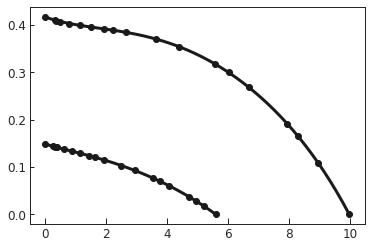

In [13]:
# Fitting a polynomial to Papale 
# 5 kbar, 1200C
x_5kbar_1200=PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_20Fe3_5kbar_1200", 'Diss H2O']
y_5kbar_1200=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_20Fe3_5kbar_1200", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_5kbar_1200, y_5kbar_1200, 5))
P_x_5kbar_1200_new = np.linspace(min(x_5kbar_1200), max(x_5kbar_1200), 50)
P_y_5kbar_1200_new = Pf(P_x_5kbar_1200_new)
plt.plot(x_5kbar_1200, y_5kbar_1200, '.k')
plt.plot(P_x_5kbar_1200_new, P_y_5kbar_1200_new, '-k')

# Fitting a polynomial to Papale 
# 5 kbar, 1200C
x_2kbar_1200=PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_20Fe3_2kbar_1200", 'Diss H2O']
y_2kbar_1200=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_20Fe3_2kbar_1200", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_2kbar_1200, y_2kbar_1200, 5))
P_x_2kbar_1200_new = np.linspace(min(x_2kbar_1200), max(x_2kbar_1200), 50)
P_y_2kbar_1200_new = Pf(P_x_2kbar_1200_new)
plt.plot(x_2kbar_1200, y_2kbar_1200, '.k')
plt.plot(P_x_2kbar_1200_new, P_y_2kbar_1200_new, '-k')



/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


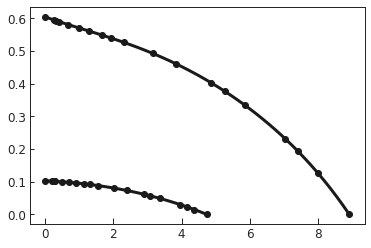

In [14]:
# Fitting a polynomial to Papale 
# 2 kbar, 1200C
x_70Fe2kbar_1200=PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_70Fe3_2kbar_1200", 'Diss H2O']
y_70Fe2kbar_1200=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_70Fe3_2kbar_1200", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_70Fe2kbar_1200, y_70Fe2kbar_1200, 5))
P_x_70Fe2kbar_1200_new = np.linspace(min(x_70Fe2kbar_1200), max(x_70Fe2kbar_1200), 50)
P_y_70Fe2kbar_1200_new = Pf(P_x_70Fe2kbar_1200_new)
plt.plot(x_70Fe2kbar_1200, y_70Fe2kbar_1200, '.k')
plt.plot(P_x_70Fe2kbar_1200_new, P_y_70Fe2kbar_1200_new, '-k')

# Fitting a polynomial to Papale 
# 5 kbar, 1200C
x_70Fe5kbar_1200=PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_70Fe3_5kbar_1200", 'Diss H2O']
y_70Fe5kbar_1200=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_70Fe3_5kbar_1200", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_70Fe5kbar_1200, y_70Fe5kbar_1200, 5))
P_x_70Fe5kbar_1200_new = np.linspace(min(x_70Fe5kbar_1200), max(x_70Fe5kbar_1200), 50)
P_y_70Fe5kbar_1200_new = Pf(P_x_70Fe5kbar_1200_new)
plt.plot(x_70Fe5kbar_1200, y_70Fe5kbar_1200, '.k')
plt.plot(P_x_70Fe5kbar_1200_new, P_y_70Fe5kbar_1200_new, '-k')




/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


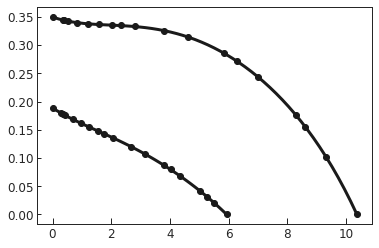

In [15]:
# Fitting a polynomial to Papale 
# 2 kbar, 1200C
x_0Fe2kbar_1200=PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_0Fe3_2kbar_1200", 'Diss H2O']
y_0Fe2kbar_1200=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_0Fe3_2kbar_1200", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_0Fe2kbar_1200, y_0Fe2kbar_1200, 5))
P_x_0Fe2kbar_1200_new = np.linspace(min(x_0Fe2kbar_1200), max(x_0Fe2kbar_1200), 50)
P_y_0Fe2kbar_1200_new = Pf(P_x_0Fe2kbar_1200_new)
plt.plot(x_0Fe2kbar_1200, y_0Fe2kbar_1200, '.k')
plt.plot(P_x_0Fe2kbar_1200_new, P_y_0Fe2kbar_1200_new, '-k')

# Fitting a polynomial to Papale 
# 5 kbar, 1200C
x_0Fe5kbar_1200=PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_0Fe3_5kbar_1200", 'Diss H2O']
y_0Fe5kbar_1200=10**(-4)*PapaleIsobars.loc[PapaleIsobars['Sample']=="Bot_2006_0Fe3_5kbar_1200", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_0Fe5kbar_1200, y_0Fe5kbar_1200, 5))
P_x_0Fe5kbar_1200_new = np.linspace(min(x_0Fe5kbar_1200), max(x_0Fe5kbar_1200), 50)
P_y_0Fe5kbar_1200_new = Pf(P_x_0Fe5kbar_1200_new)
plt.plot(x_0Fe5kbar_1200, y_0Fe5kbar_1200, '.k')
plt.plot(P_x_0Fe5kbar_1200_new, P_y_0Fe5kbar_1200_new, '-k')




/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-671bb83c0154>:100: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(P_x_0Fe2kbar_1200_new, P_y_0Fe2kbar_1200_new, '-', color='green', linestyle='dotted', linewidth=2)
<ipython-input-16-671bb83c0154>:101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(P_x_70Fe2kbar_1200_new, P_y_70Fe2kbar_1200_new, '-', color='green', linestyle='dashdot', linewidth=2)
<ipython-inpu

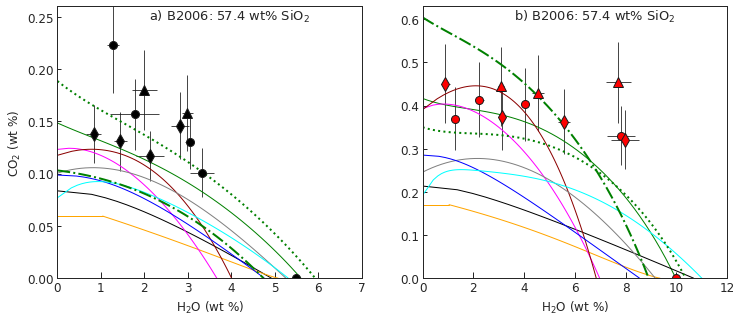

In [16]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5))

######## Papale 5 kbar -------------------------------------------
x1_pap=P_x_5kbar_1200_new
y1_pap=P_y_5kbar_1200_new


ax2.plot(x1_pap, y1_pap, color='green', linewidth=1)

######## Papale 2 kbar


x1_pap=P_x_2kbar_1200_new
y1_pap=P_y_2kbar_1200_new



ax1.plot(x1_pap, y1_pap, color='green', linewidth=1)

################### VolatileCalc Rhyolite 2000 bar Isobar #################################################################################

x1_vcr=VolatileCalcRhyolite_r['Rhyolite_1200C_2000bars_H2O']

y1_vcr=VolatileCalcRhyolite_r['Rhyolite_1200C_2000bars_CO2']


ax1.plot(x1_vcr, y1_vcr, color='black', linewidth=1)

########################## VolatileCalc Rhyolite 5 kbar isobar

x1_vcr=VolatileCalcRhyolite_r['Rhyolite_1200C_5000bars_H2O']
y1_vcr=VolatileCalcRhyolite_r['Rhyolite_1200C_5000bars_CO2']
ax2.plot(x1_vcr, y1_vcr, color='black', linewidth=1)
## 850C



######################  Shishkina - no dependent on temp, so no need to fill a region. 

ax2.plot(smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==5000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==5000, 'CO2_liq'], color='orange', linewidth=1)
ax1.plot(smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==2000, 'H2O_liq'], 
        smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==2000, 'CO2_liq'], color='orange', linewidth=1)

ax2.plot([0, smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==5000, 'H2O_liq'].iloc[0]], 
        [smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==5000, 'CO2_liq'].iloc[0], 
         smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==5000, 'CO2_liq'].iloc[0]], color='orange', linewidth=1)
ax1.plot([0, smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==2000, 'H2O_liq'].iloc[0]], 
        [smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==2000, 'CO2_liq'].iloc[0], 
         smoothed_isobars_B2006_1200_Shish.loc[smoothed_isobars_B2006_1200_Shish.Pressure==2000, 'CO2_liq'].iloc[0]], color='orange', linewidth=1)


############################ IaconoMarziano Hydrous 5 kbar #########################################
x1=smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==5000, 'H2O_liq']
y1=smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==5000, 'CO2_liq']

ax2.plot(smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==5000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==5000, 'CO2_liq'], color='magenta', linewidth=1)

###################################### IaconoMArziano Hydrous 2 kbar
x1=smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==2000, 'H2O_liq']
y1=smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==2000, 'CO2_liq']

ax1.plot(smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==2000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_IM.loc[smoothed_isobars_B2006_1200_IM.Pressure==2000, 'CO2_liq'], color='magenta', linewidth=1)


############################ IaconoMarziano Anhydrous 5 kbar #########################################
x1=smoothed_isobars_B2006_1200_IM_An.loc[smoothed_isobars_B2006_1200_IM_An.Pressure==5000, 'H2O_liq']
y1=smoothed_isobars_B2006_1200_IM_An.loc[smoothed_isobars_B2006_1200_IM_An.Pressure==5000, 'CO2_liq']

ax2.plot(smoothed_isobars_B2006_1200_IM_An.loc[smoothed_isobars_B2006_1200_IM_An.Pressure==5000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_IM_An.loc[smoothed_isobars_B2006_1200_IM_An.Pressure==5000, 'CO2_liq'], color='darkred', linewidth=1)

###################################### IaconoMArziano Anhydrous 2 kbar
ax1.plot(smoothed_isobars_B2006_1200_IM_An.loc[smoothed_isobars_B2006_1200_IM_An.Pressure==2000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_IM_An.loc[smoothed_isobars_B2006_1200_IM_An.Pressure==2000, 'CO2_liq'], color='darkred', linewidth=1)

# Magmasat 1300-1000 5000 bar isobar #################################################################################
ax2.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200.Pressure==5000, 'H2O_liq'], 
         smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200.Pressure==5000, 'CO2_liq'], color='grey', linewidth=1)
ax1.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200.Pressure==2000, 'H2O_liq'], 
         smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200.Pressure==2000, 'CO2_liq'], color='grey', linewidth=1)
########## Dixon ################################

ax2.plot(smoothed_isobars_B2006_1200_Dixon.loc[smoothed_isobars_B2006_1200_Dixon.Pressure==5000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_Dixon.loc[smoothed_isobars_B2006_1200_Dixon.Pressure==5000, 'CO2_liq'], color='blue', linewidth=1)
ax1.plot(smoothed_isobars_B2006_1200_Dixon.loc[smoothed_isobars_B2006_1200_Dixon.Pressure==2000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_Dixon.loc[smoothed_isobars_B2006_1200_Dixon.Pressure==2000, 'CO2_liq'], color='blue', linewidth=1)


########################### Liu
ax2.plot(smoothed_isobars_B2006_1200_Liu.loc[smoothed_isobars_B2006_1200_Liu.Pressure==5000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_Liu.loc[smoothed_isobars_B2006_1200_Liu.Pressure==5000, 'CO2_liq'], color='cyan', linewidth=1)

ax1.plot(smoothed_isobars_B2006_1200_Liu.loc[smoothed_isobars_B2006_1200_Liu.Pressure==2000, 'H2O_liq'], 
         smoothed_isobars_B2006_1200_Liu.loc[smoothed_isobars_B2006_1200_Liu.Pressure==2000, 'CO2_liq'], color='cyan', linewidth=1)

# Papale redox extremes
ax1.plot(P_x_0Fe2kbar_1200_new, P_y_0Fe2kbar_1200_new, '-', color='green', linestyle='dotted', linewidth=2)
ax1.plot(P_x_70Fe2kbar_1200_new, P_y_70Fe2kbar_1200_new, '-', color='green', linestyle='dashdot', linewidth=2)

ax2.plot(P_x_0Fe5kbar_1200_new, P_y_0Fe5kbar_1200_new, '-', color='green', linestyle='dotted', linewidth=2)
ax2.plot(P_x_70Fe5kbar_1200_new, P_y_70Fe5kbar_1200_new, '-', color='green', linestyle='dashdot', linewidth=2)


# Experimental data------------------------------------------------------------------
ax1.errorbar(Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==200), 'H2O (tot)'], 10**(-4)*Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==200), 'CO2 Tot'], 
             xerr=2*Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==200), 'error (H2O)'], yerr=2*10**(-4)*Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==200), 'Error'], 
             fmt='o', ecolor='k', elinewidth=0.8, mfc='black', ms=8, mec='k')
ax2.errorbar(Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==500), 'H2O (tot)'], 10**(-4)*Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==500), 'CO2 Tot'], 
             xerr=2*Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==500), 'error (H2O)'], yerr=10**(-4)*2*Bot2006.loc[(Bot2006.Temperature==1200)&(Bot2006.Pressure==500), 'Error'], 
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k')
## 1100
ax1.errorbar(Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==200), 'H2O (tot)'], 10**(-4)*Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==200), 'CO2 Tot'], 
             xerr=2*Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==200), 'error (H2O)'], yerr=10**(-4)*2*Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==200), 'Error'], 
             fmt='^', ecolor='k', elinewidth=0.8, mfc='black', ms=10, mec='k')
ax2.errorbar(Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==500), 'H2O (tot)'], 10**(-4)*Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==500), 'CO2 Tot'], 
             xerr=2*Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==500), 'error (H2O)'], yerr=10**(-4)*2*Bot2006.loc[(Bot2006.Temperature==1100)&(Bot2006.Pressure==500), 'Error'], 
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')
# 1300
ax1.errorbar(Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==200), 'H2O (tot)'], 10**(-4)*Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==200), 'CO2 Tot'], 
             xerr=2*Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==200), 'error (H2O)'], yerr=10**(-4)*2*Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==200), 'Error'], 
             fmt='d', ecolor='k', elinewidth=0.8, mfc='black', ms=10, mec='k')
ax2.errorbar(Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==500), 'H2O (tot)'], 10**(-4)*Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==500), 'CO2 Tot'], 
             xerr=2*Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==500), 'error (H2O)'], yerr=10**(-4)*2*Bot2006.loc[(Bot2006.Temperature==1300)&(Bot2006.Pressure==500), 'Error'], 
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')
ax1.set_xlim([0, 7])
ax2.set_xlim([0, 12])
ax1.set_ylim([0, 0.2600])
ax2.set_ylim([0, 0.6300])

ax1.annotate("a) B2006: 57.4 wt% SiO$_2$", xy=(0.3, 0.95), xycoords="axes fraction", fontsize=13)
ax2.annotate("b) B2006: 57.4 wt% SiO$_2$", xy=(0.3, 0.95), xycoords="axes fraction", fontsize=13)
ax1.set_xlabel('H$_2$O (wt %)')
ax1.set_ylabel('CO$_2$ (wt %)')
ax2.set_xlabel('H$_2$O (wt %)')
fig.savefig('Botcharnikov 2006.svg', transparent=True)